# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving telco-customer-churn.csv to telco-customer-churn.csv


In [3]:
df = pd.read_csv("telco-customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Analysis

Customer ID is not needed for analysis as it does not help predict customer churn also it increases the dimensionality so removing it.

In [7]:
df.drop(["customerID"], inplace = True, axis = 1)

In [8]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

### Gender, SeniorCitizen, Partner, Dependents

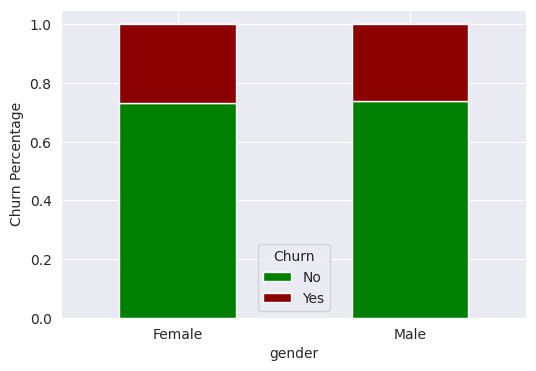

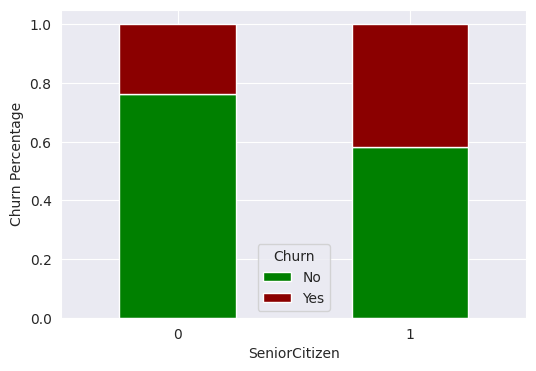

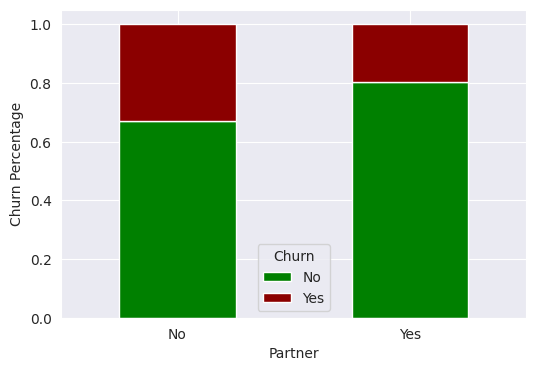

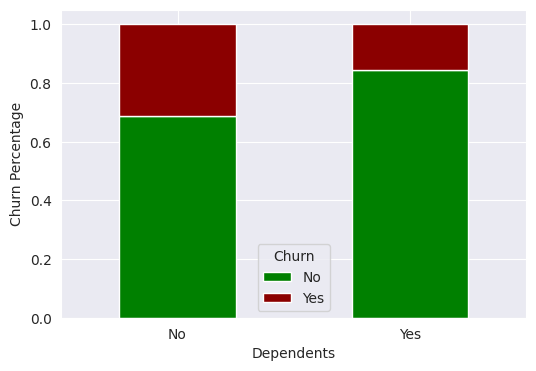

In [9]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

In [10]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()

No     1437
Yes     229
Name: Churn, dtype: int64

In [11]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'No')].Churn.value_counts()

No     921
Yes    242
Name: Churn, dtype: int64

In [12]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'Yes')].Churn.value_counts()

No     278
Yes     75
Name: Churn, dtype: int64

In [13]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()

No     1872
Yes     847
Name: Churn, dtype: int64

### Tenure

In [14]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [15]:
df['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

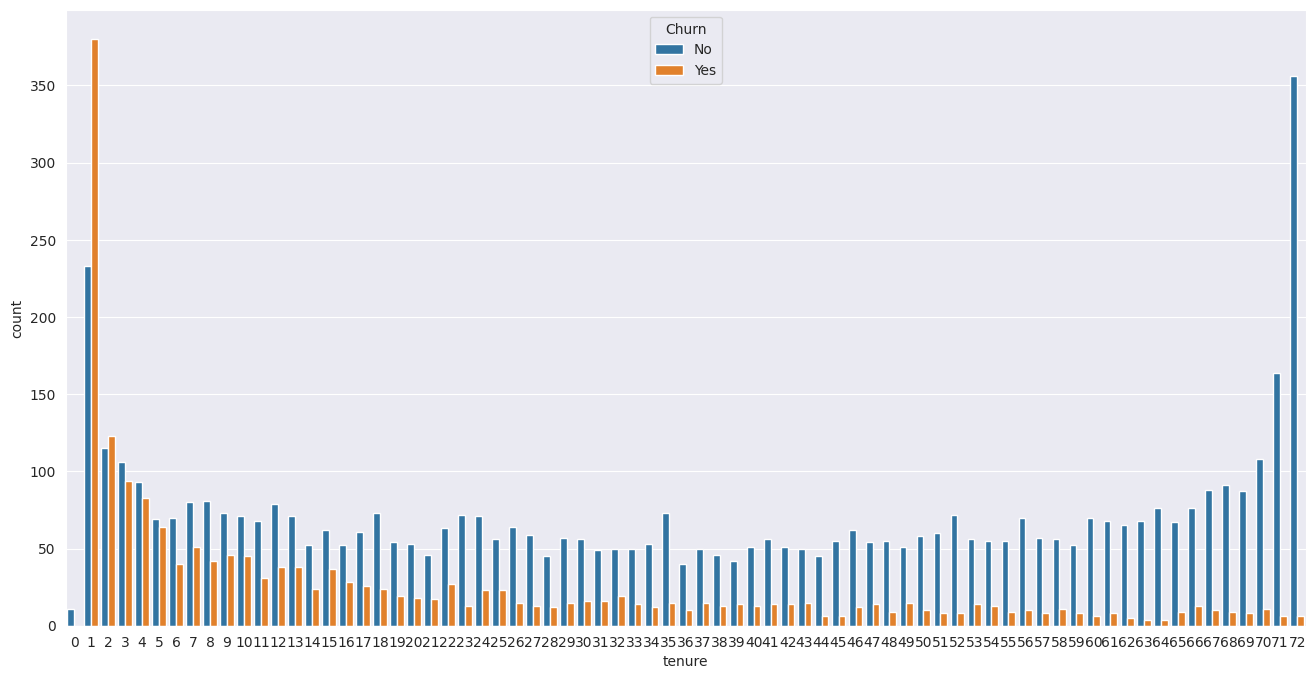

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

From above analysis, the higher the tenure, the lesser the churn rate.

Converting into 5 groups to reduce model complexity.

In [17]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [18]:
df["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

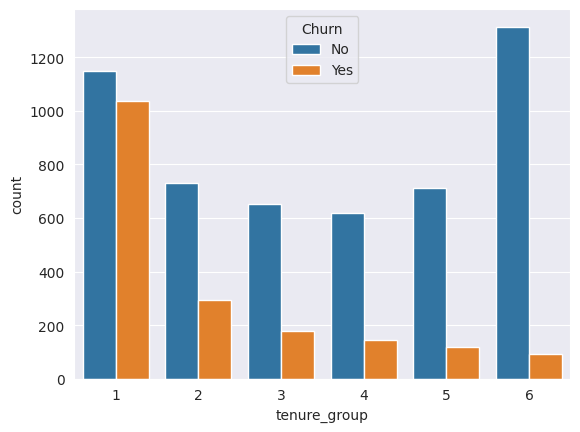

In [19]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

### Phone Service and MultipleLines

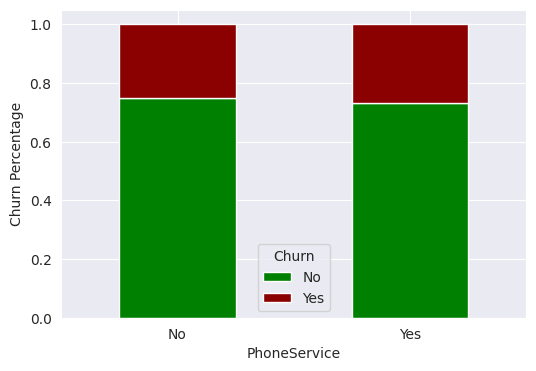

In [20]:
stacked_plot(df, "PhoneService", "Churn")

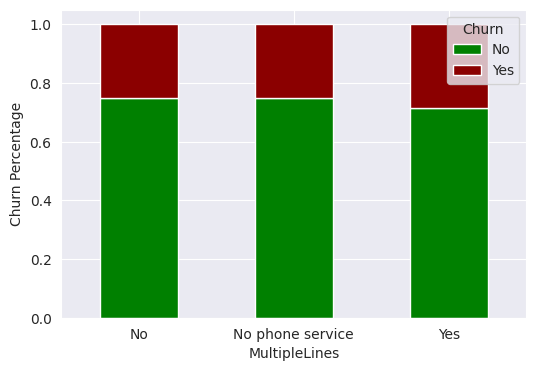

In [21]:
stacked_plot(df, "MultipleLines", "Churn")

From above results, multiplelines and phoneservice do not add value in the model having similar churn rate.

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

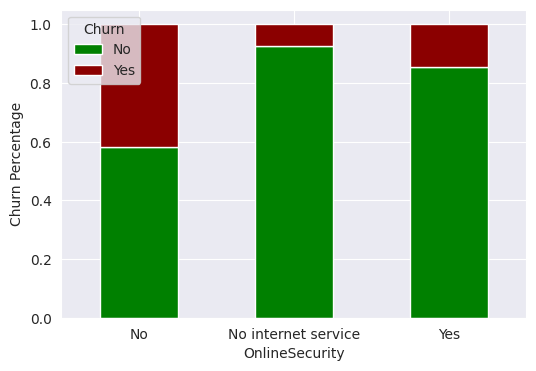

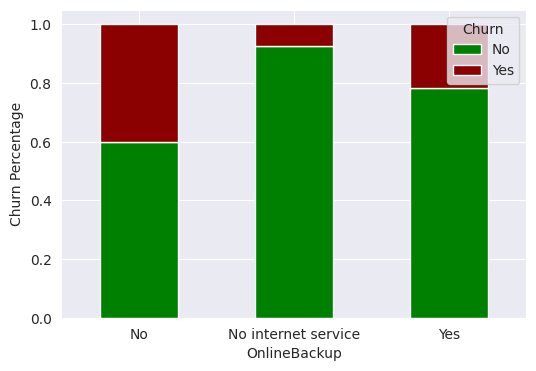

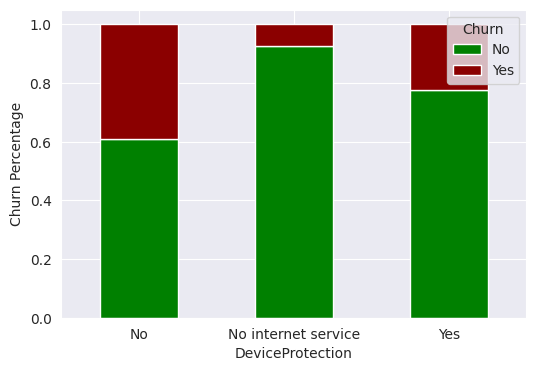

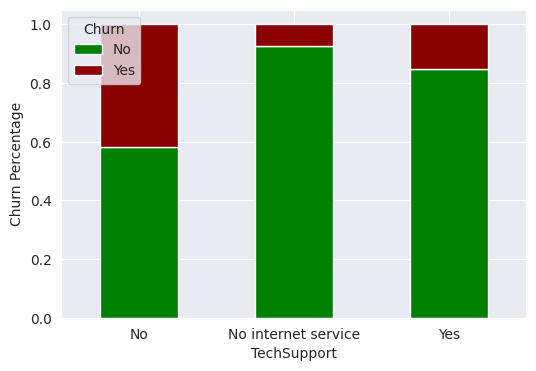

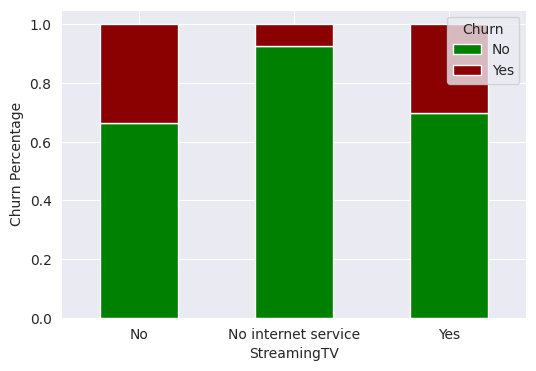

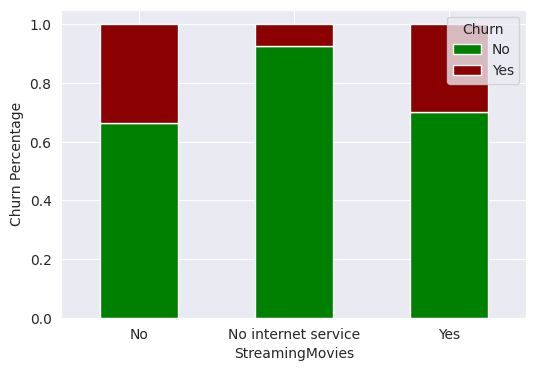

In [22]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

All above categories show consistent results. If a person does not opt for internet service, the customer churning is less. Also, if they have internet service and does not opt for specific service their probability of churning is high.

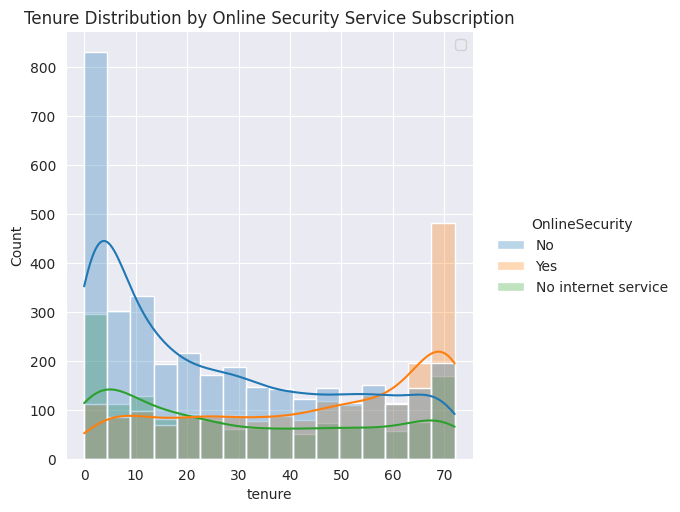

In [23]:
sns.displot(data=df, x="tenure", hue="OnlineSecurity", alpha=0.3, kde=True)
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

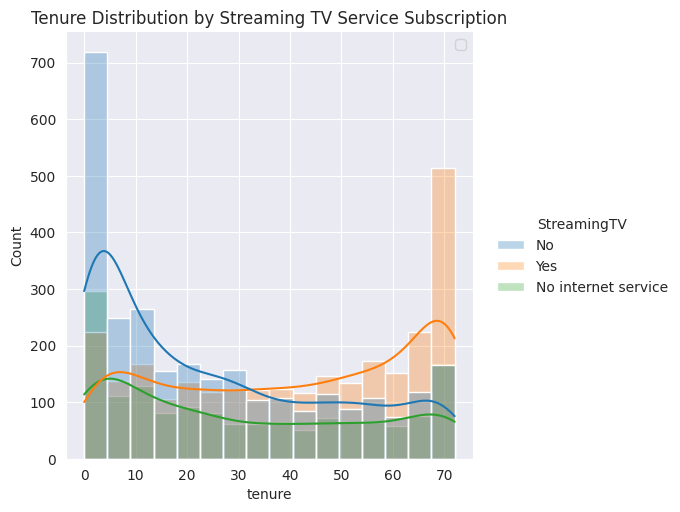

In [24]:
sns.displot(data=df, x="tenure", hue="StreamingTV", alpha=0.3, kde=True)
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

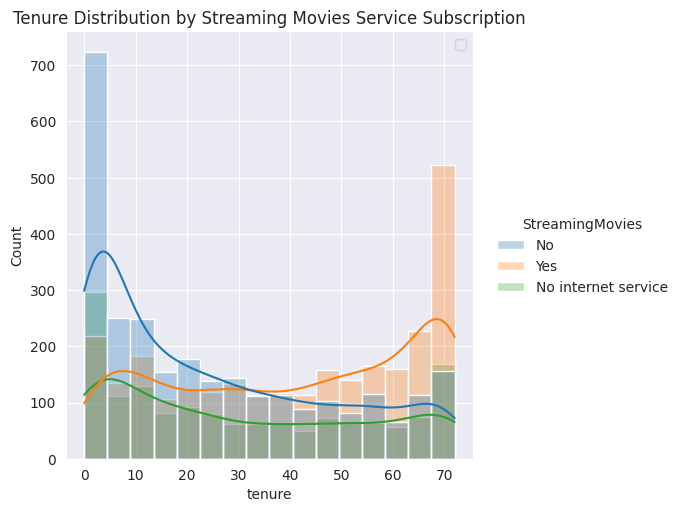

In [25]:
sns.displot(data=df, x="tenure", hue="StreamingMovies", alpha=0.3, kde=True)
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

From above analysis, when the customers are new they do not opt for various services and their churning rate is very high.

### InternetService

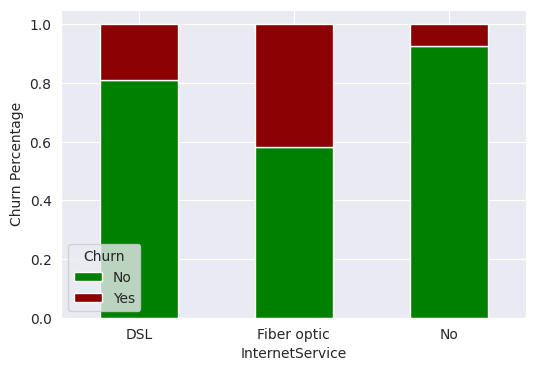

In [26]:
stacked_plot(df, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high.

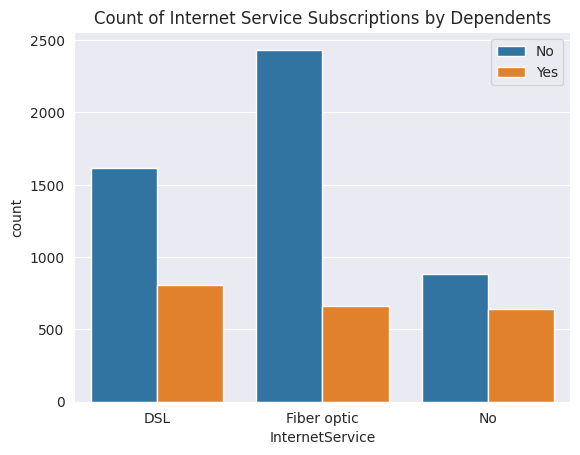

In [27]:
sns.countplot(data=df, x="InternetService", hue="Dependents")
plt.title("Count of Internet Service Subscriptions by Dependents")
plt.legend()
plt.show()

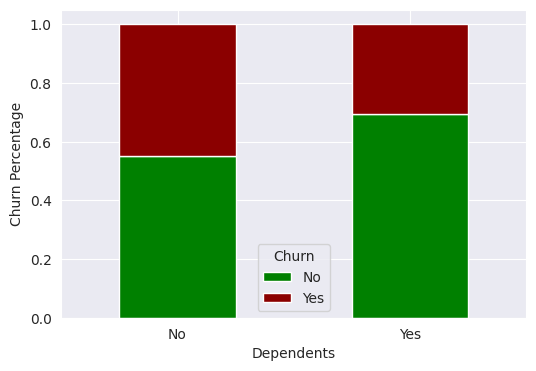

In [28]:
stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

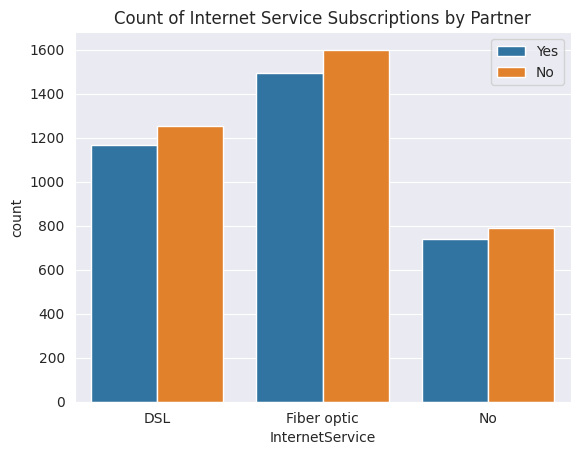

In [29]:
sns.countplot(data=df, x="InternetService", hue="Partner")
plt.title("Count of Internet Service Subscriptions by Partner")
plt.legend()
plt.show()

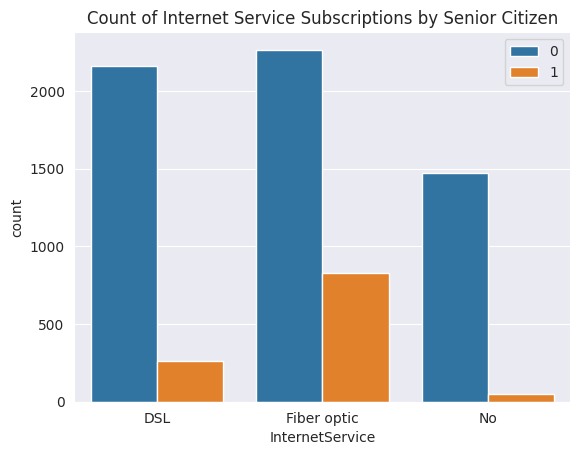

In [30]:
sns.countplot(data=df, x="InternetService", hue="SeniorCitizen")
plt.title("Count of Internet Service Subscriptions by Senior Citizen")
plt.legend()
plt.show()

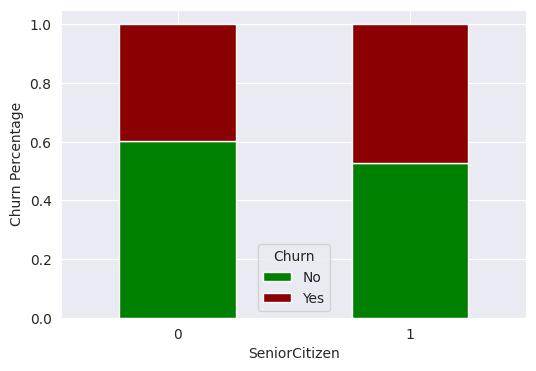

In [31]:
stacked_plot(df[df.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

Partner and Senior Citizen do not tell anything about why fiber optics have higher churning rate.

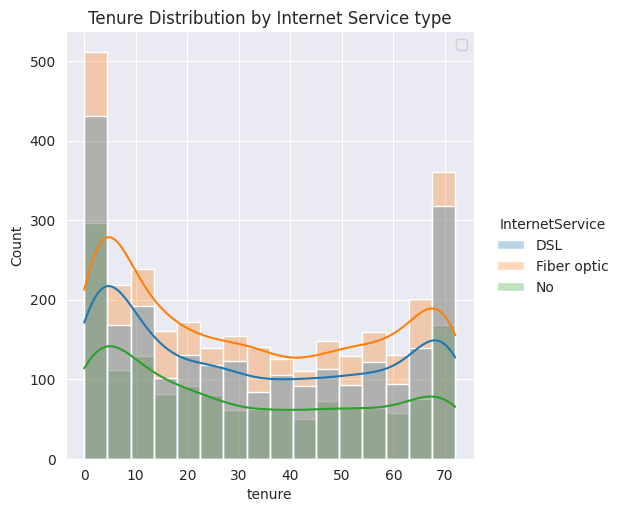

In [32]:
sns.displot(data=df, x="tenure", hue="InternetService", alpha=0.3, kde=True)
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

In [33]:
df[df.InternetService == 'No'].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No,2
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,5
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,1
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No,1


In [34]:
df[df.InternetService == 'No'].OnlineSecurity.value_counts()

No internet service    1526
Name: OnlineSecurity, dtype: int64

In [35]:
df[df.InternetService == 'No'].OnlineBackup.value_counts()

No internet service    1526
Name: OnlineBackup, dtype: int64

In [36]:
df[df.InternetService == 'No'].DeviceProtection.value_counts()

No internet service    1526
Name: DeviceProtection, dtype: int64

In [37]:
df[df.InternetService == 'No'].TechSupport.value_counts()

No internet service    1526
Name: TechSupport, dtype: int64

In [38]:
df[df.InternetService == 'No'].StreamingMovies.value_counts()

No internet service    1526
Name: StreamingMovies, dtype: int64

In [39]:
df[df.InternetService == 'No'].StreamingTV.value_counts()

No internet service    1526
Name: StreamingTV, dtype: int64

These variables must be encoded to remove dependancy in the model.

### Contract

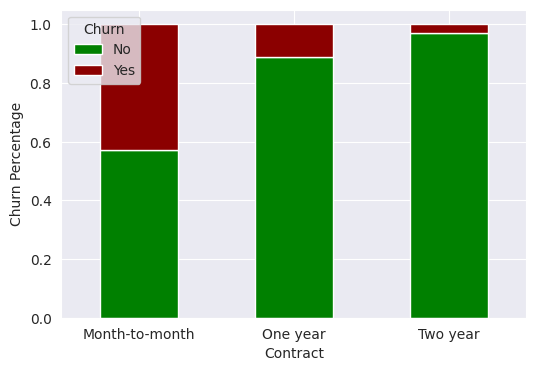

In [40]:
stacked_plot(df, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high. There is also a possibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

<Axes: xlabel='InternetService', ylabel='count'>

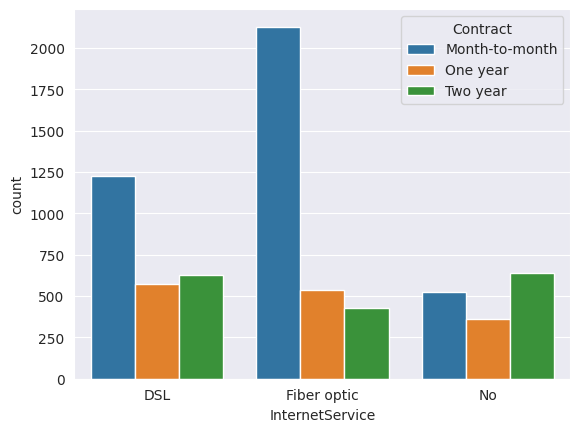

In [41]:
sns.countplot(data=df, x="InternetService", hue="Contract")

Many of the people who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

### PaymentMethod

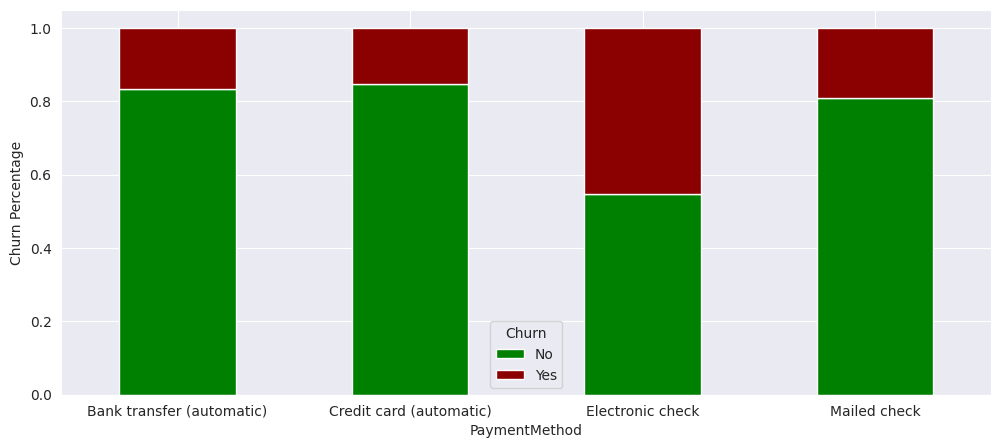

In [42]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high.

<Axes: xlabel='PaymentMethod', ylabel='count'>

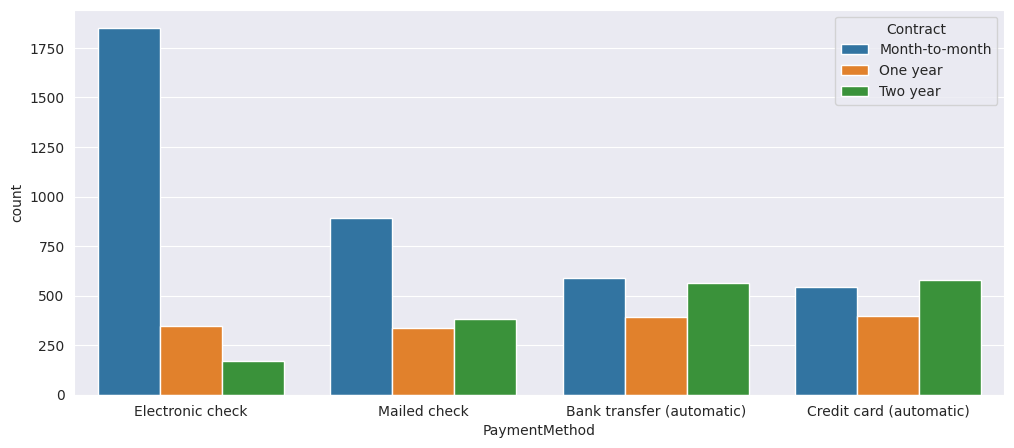

In [43]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(data=df, x="PaymentMethod", hue="Contract", ax = ax)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment.

### PaperlessBilling

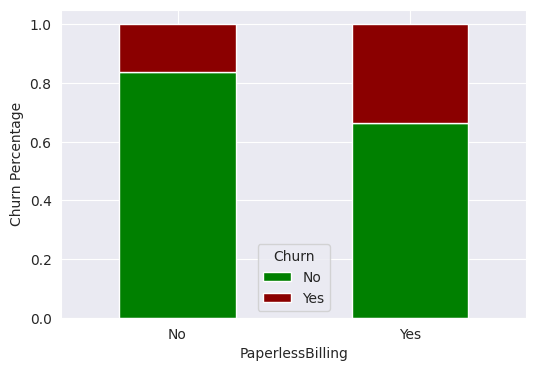

In [44]:
stacked_plot(df, "PaperlessBilling", "Churn")

### TotalCharges

In [45]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [46]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'].isna().sum()

11

In [47]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


All the customers having tenure = 0 have null total charges which can mean that these customers recently joined and those missing values can be given as 0.

In [48]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
df.isnull().any().any()

False

In [49]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

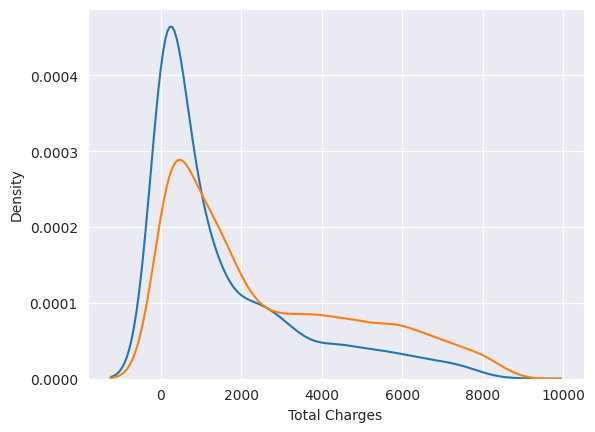

In [50]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

### Monthly Charges

In [51]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [52]:
df.MonthlyCharges.isna().sum()

0

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

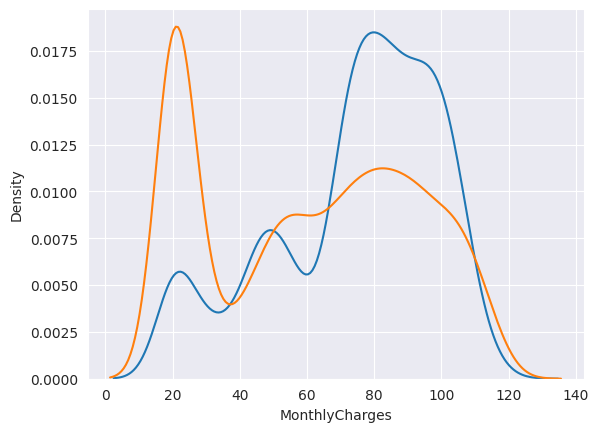

In [53]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

The customers paying high monthly fees churn more.

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Modelling

In [55]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = df.apply(lambda x: encode_data(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,1
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,3
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,4
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,1


In [56]:
X = data.drop(columns = "Churn")
y = data["Churn"].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

The features need standard scaling as all of them are distributed over different range values.

In [58]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [59]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))

In [60]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)

    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    model_results.loc[i] = [name,
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.59,1.57,74.58,1.87
4,Gradient boost classifier,84.43,1.44,79.98,1.44
3,Random Forest,82.63,1.80,78.50,1.54
1,Gaussian NB,82.33,1.85,74.79,1.95
2,Decision Tree Classifier,65.49,2.47,73.08,1.22


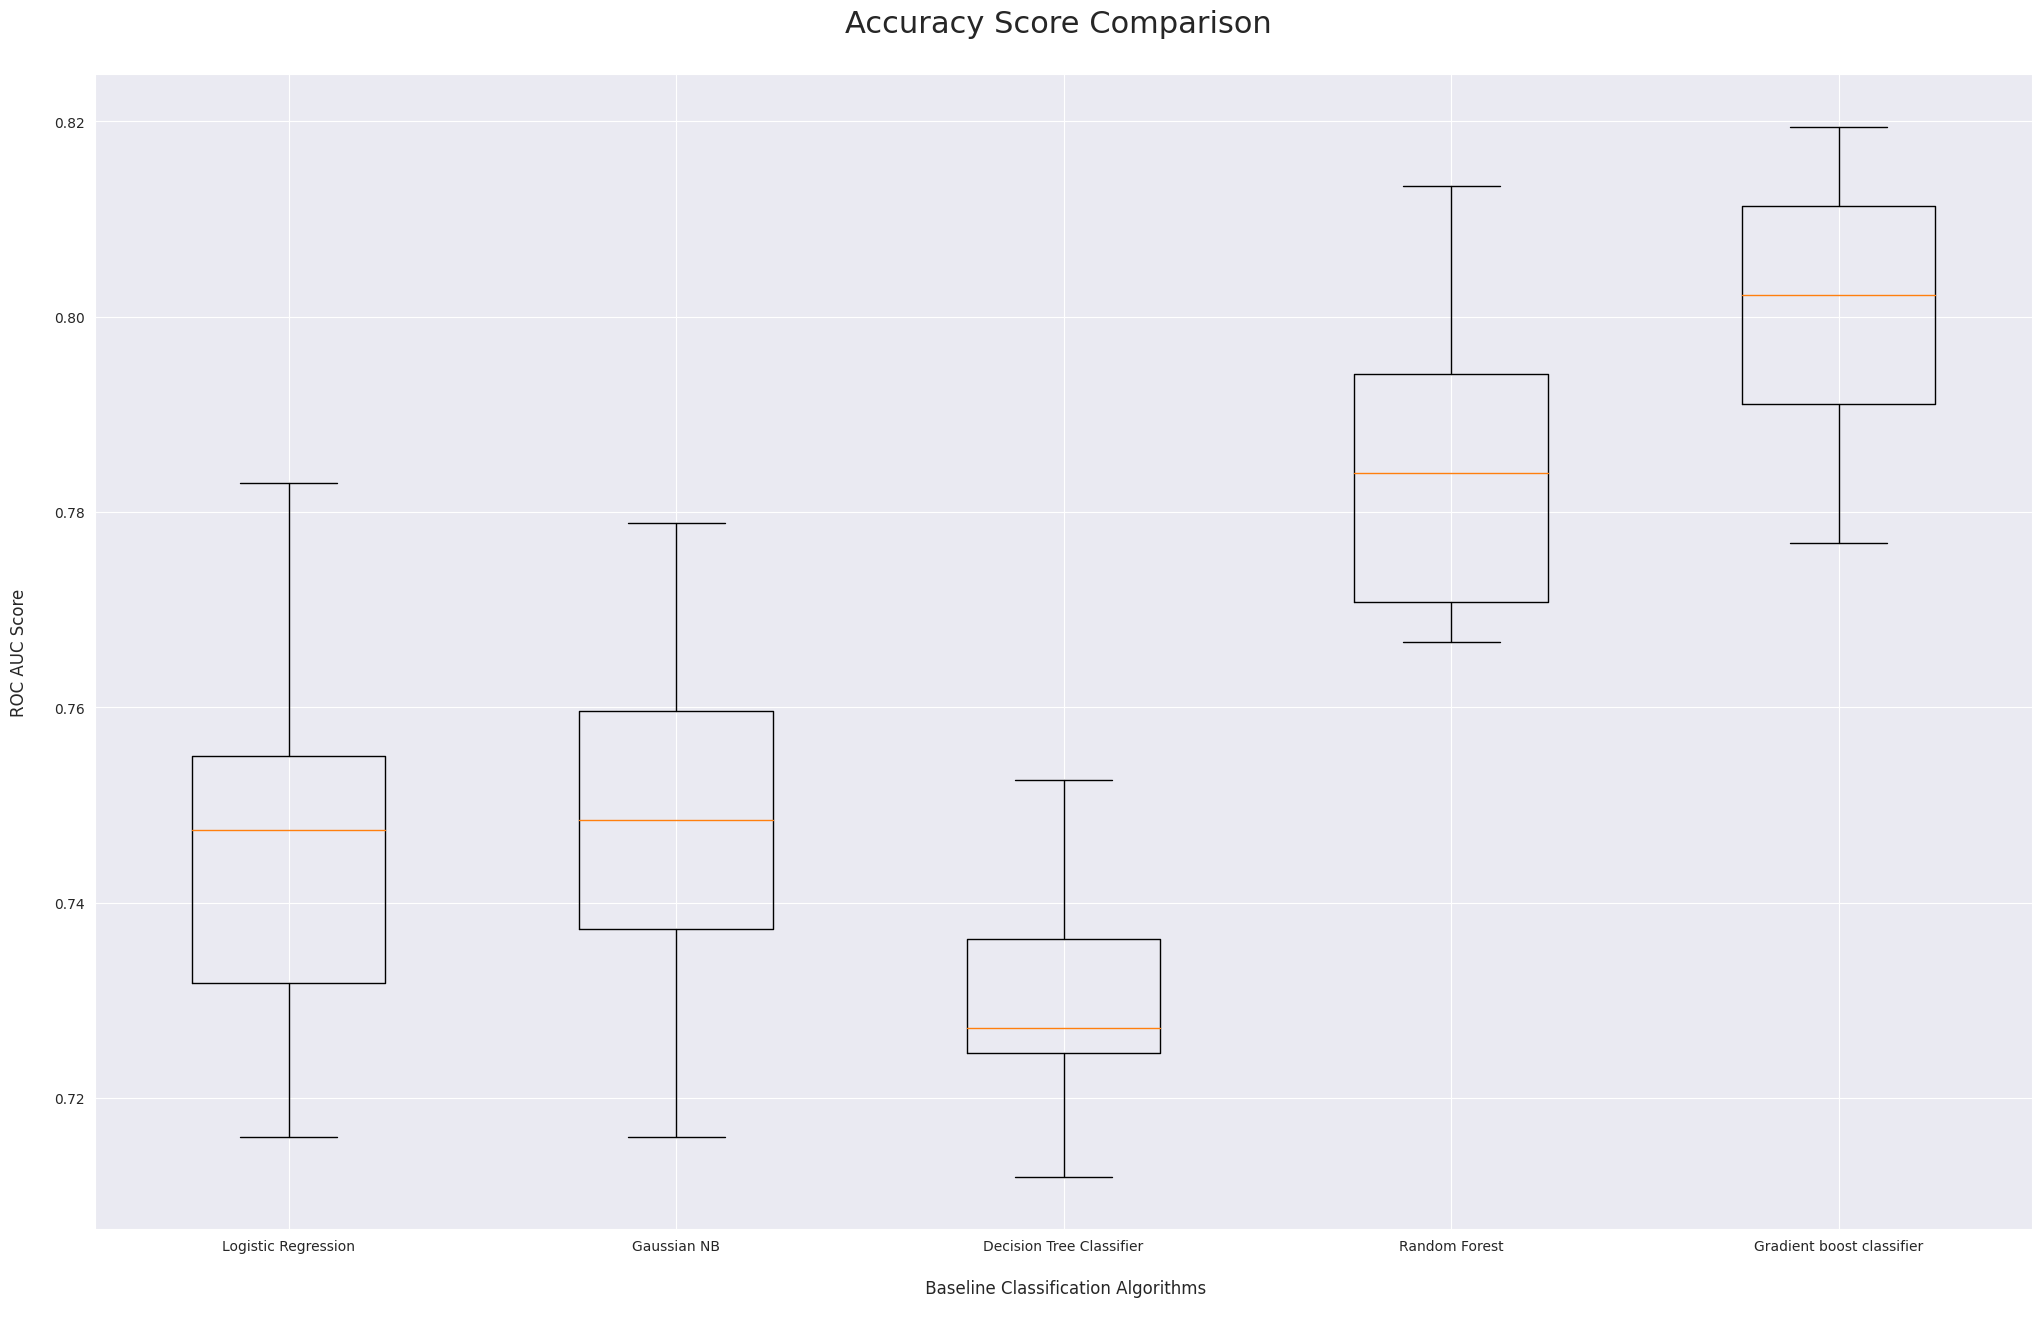

In [61]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

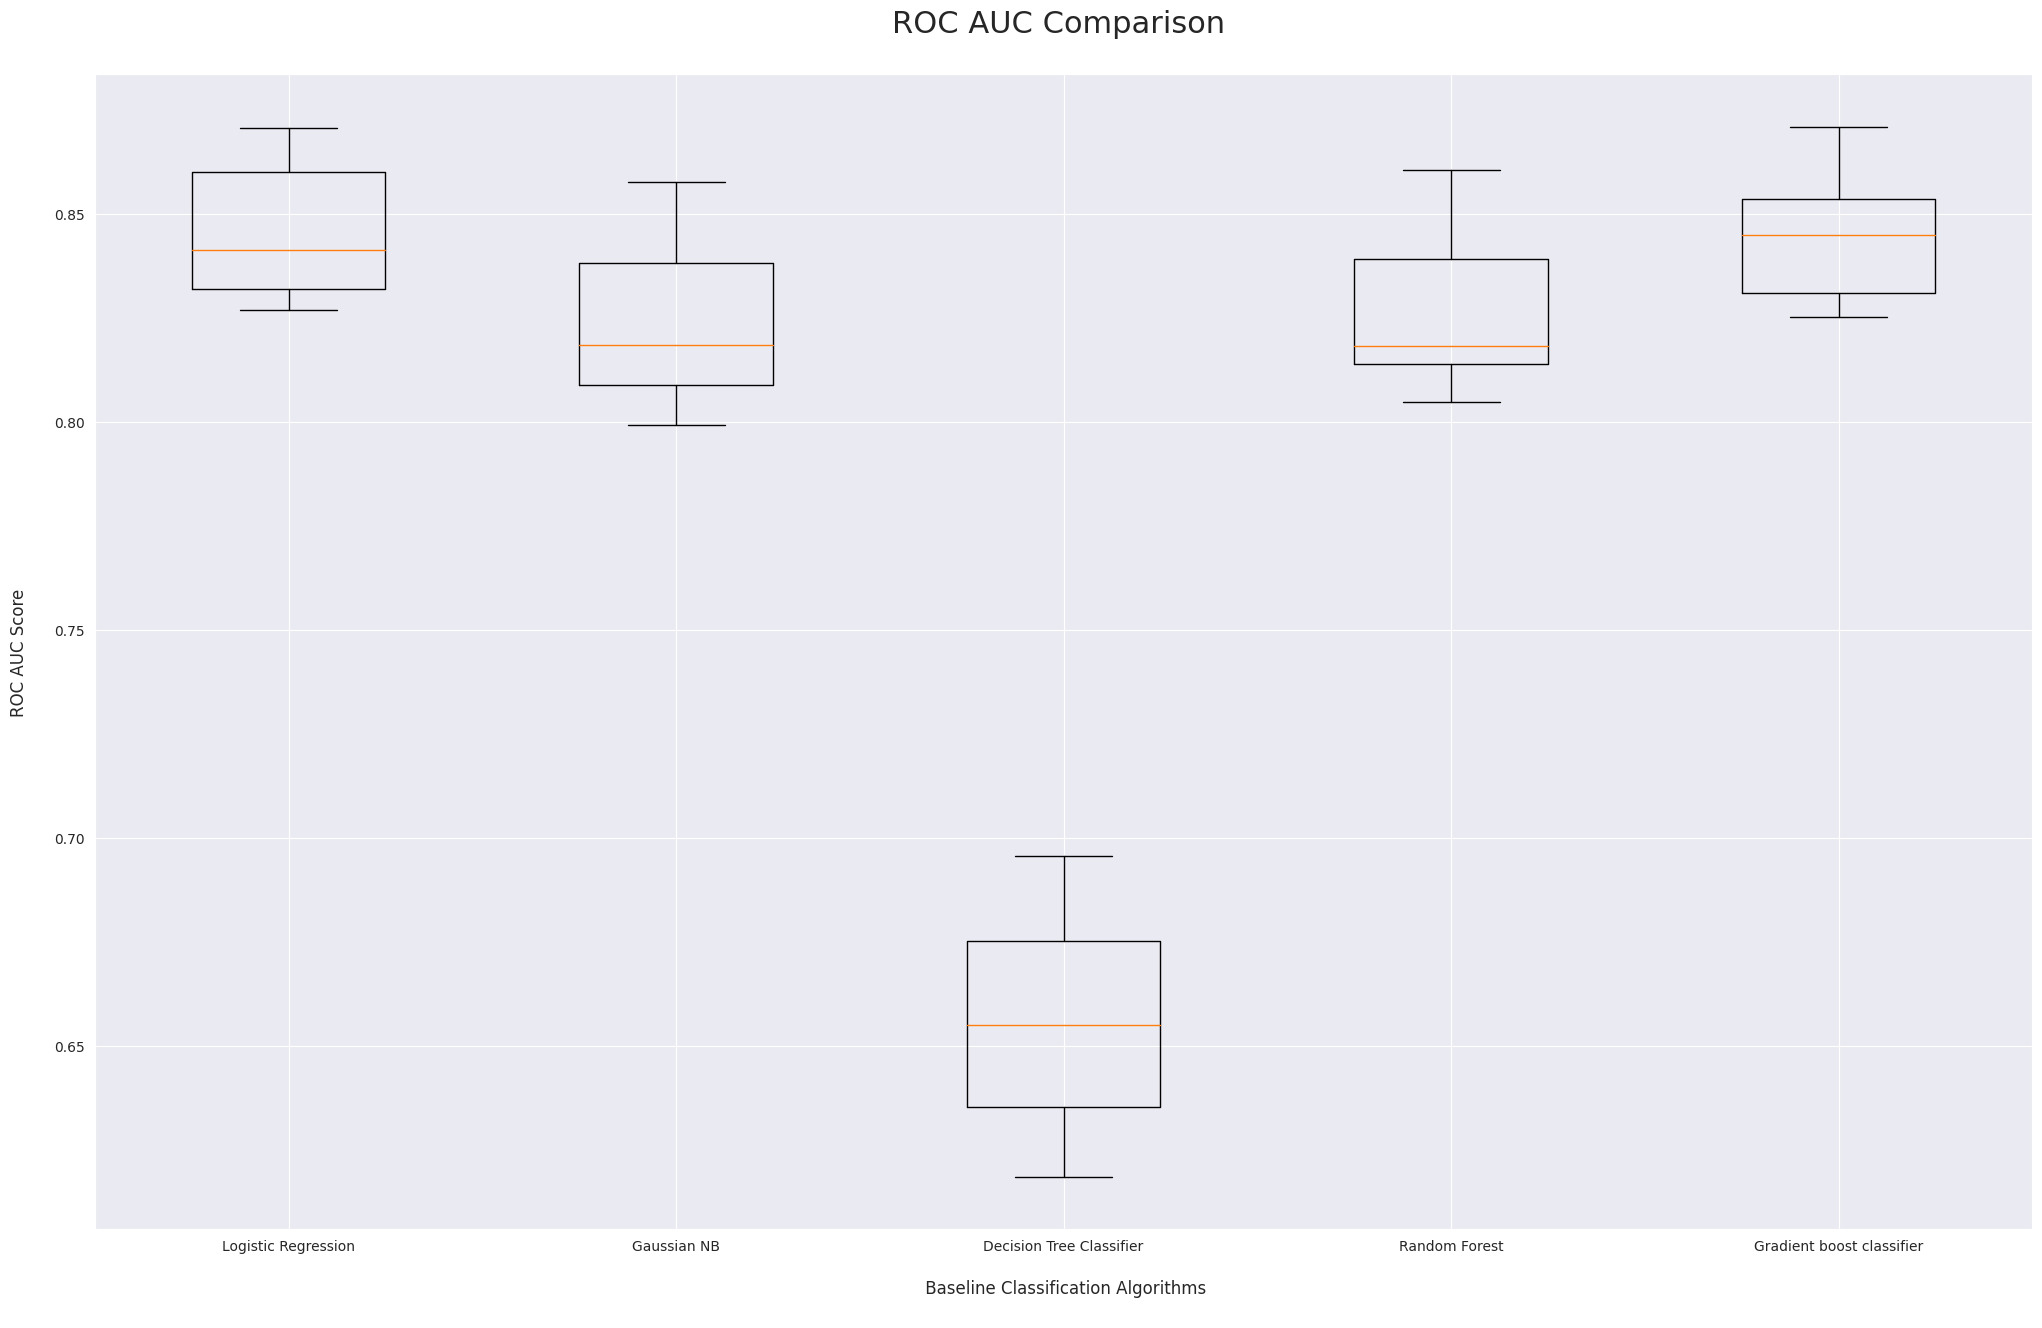

In [62]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Random Forest

In [63]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

In [64]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.7231424514907714
2 : 0.751538097491718
3 : 0.7572172266919073
4 : 0.7704685281590156
5 : 0.7662091812588736
6 : 0.7690487458589683
7 : 0.7699952673923331
8 : 0.7780407004259347
9 : 0.7718883104590629
10 : 0.780407004259347
11 : 0.780407004259347
12 : 0.7827733080927591
13 : 0.7808802650260294
14 : 0.7799337434926644
15 : 0.783719829626124
16 : 0.7903454803596782
17 : 0.7889256980596309
18 : 0.7879791765262659
19 : 0.7856128726928537
20 : 0.7917652626597255
21 : 0.7884524372929484
22 : 0.7898722195929957
23 : 0.7941315664931378
24 : 0.792238523426408
25 : 0.7908187411263606
26 : 0.7950780880265026
27 : 0.7936583057264552
28 : 0.792238523426408
29 : 0.7908187411263606
30 : 0.792238523426408
31 : 0.795551348793185
32 : 0.7917652626597255
33 : 0.7960246095598675
34 : 0.7931850449597728
35 : 0.7950780880265026
36 : 0.7983909133932797
37 : 0.7936583057264552
38 : 0.795551348793185
39 : 0.79649787032655
40 : 0.7960246095598675
41 : 0.795551348793185
42 : 0.7946048272598202
43 : 0.796497

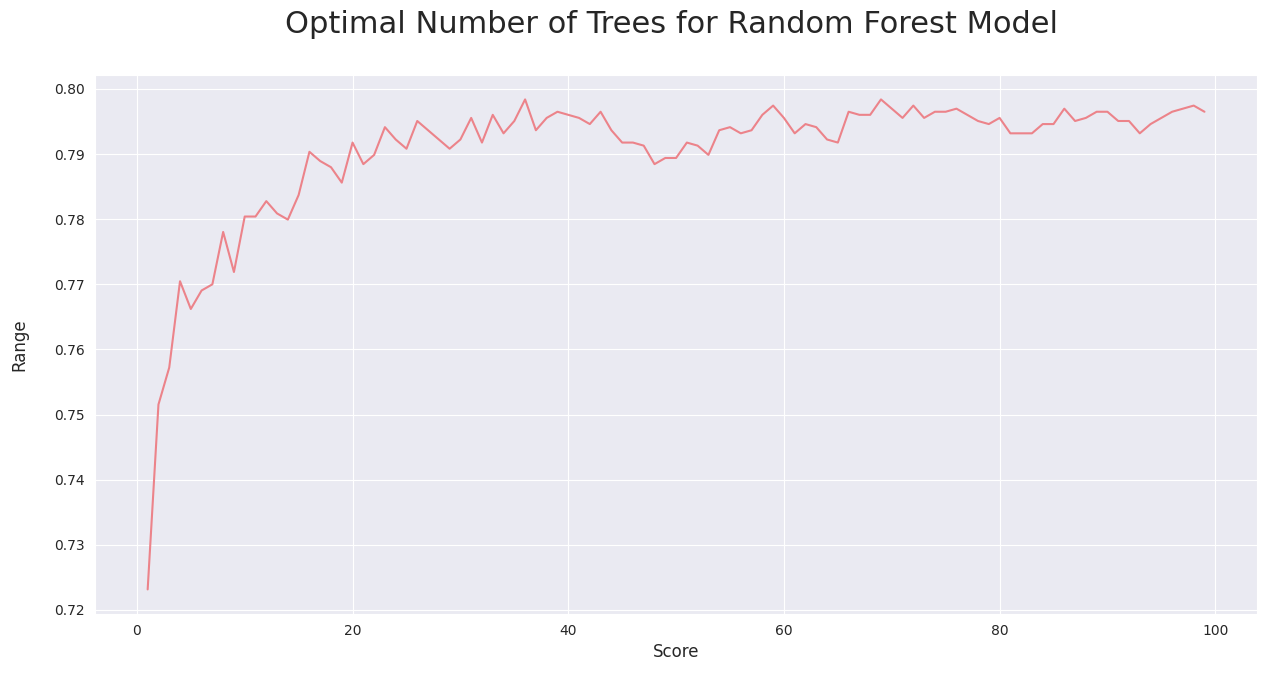

In [65]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [66]:
#evaluation of results

from sklearn.metrics import fbeta_score

def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [67]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Naive Bayes
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

#Decision tree
classifier2 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#Random Forest

classifier3 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

#Gradient Boost
classifier4 = GradientBoostingClassifier()
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

In [68]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
nb = model_evaluation(y_test, y_pred1, "Naive Bayes")
dt = model_evaluation(y_test, y_pred2, "Decision Tree")
rf = model_evaluation(y_test, y_pred3, "Random Forest")
gb = model_evaluation(y_test, y_pred4, "Gradient Boost")

In [69]:
eval_ =lr.append(nb).append(dt).append(rf).append(gb).sort_values(["Precision",
"Recall", "F2 Score"], ascending = False).reset_index().drop(columns = "index")
eval_

<ipython-input-69-f1d8b0af4d2a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_ =lr.append(nb).append(dt).append(rf).append(gb).sort_values(["Precision",
<ipython-input-69-f1d8b0af4d2a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_ =lr.append(nb).append(dt).append(rf).append(gb).sort_values(["Precision",
<ipython-input-69-f1d8b0af4d2a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_ =lr.append(nb).append(dt).append(rf).append(gb).sort_values(["Precision",
<ipython-input-69-f1d8b0af4d2a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_ =lr.append(nb).append(dt).append(rf).append(gb).sort_values(["Precision",


,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Gradient Boost,0.802177,0.662870,0.518717,0.582000,0.542303
1,Logistic Regression,0.803597,0.656652,0.545455,0.595910,0.564576
2,Random Forest,0.790819,0.642686,0.477718,0.548057,0.503570
3,Naive Bayes,0.752958,0.524044,0.757576,0.619534,0.695581
4,Decision Tree,0.717937,0.468354,0.461676,0.464991,0.462996


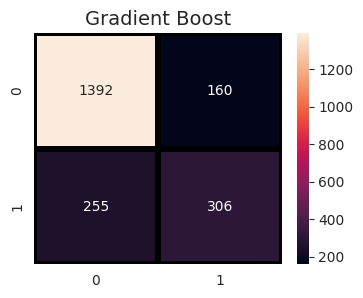

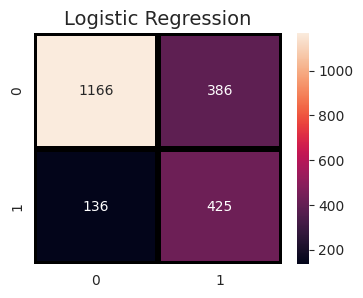

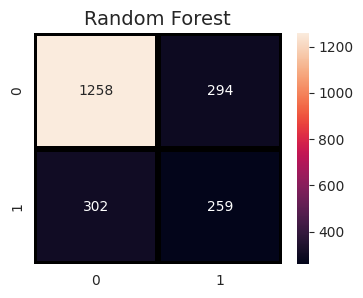

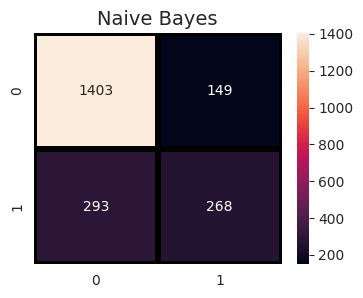

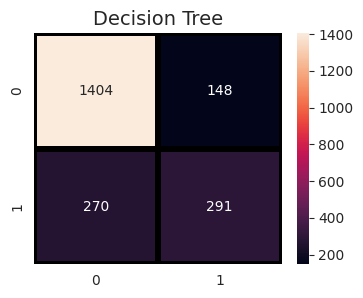

In [70]:
predictions = [y_pred, y_pred1, y_pred2, y_pred3, y_pred4]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

    plt.title(j,fontsize=14)
    plt.show()

k-Fold Cross-Validation: Model evaluation is most commonly done through ‘K-fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set. So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

# Model Evaluation

In [71]:
from sklearn.model_selection import cross_val_score

def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =20)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [72]:
k_fold_cross_validation(classifier4, "Gradient Boost classifier")

Gradient Boost classifier accuracy: 0.80 (+/- 0.04)


In [73]:
k_fold_cross_validation(classifier3, "Random Forest Classifier")

Random Forest Classifier accuracy: 0.79 (+/- 0.04)


In [74]:
k_fold_cross_validation(classifier2, "Decision Tree Classifier")

Decision Tree Classifier accuracy: 0.73 (+/- 0.05)


In [75]:
k_fold_cross_validation(classifier1, "Naive Bayes Classifier")

Naive Bayes Classifier accuracy: 0.75 (+/- 0.05)


In [76]:
# ROC Curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train)
    probs = classifier_.predict_proba(X_test)
    probs = probs[:, 1]
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc

    plt.plot(rf_fpr, rf_tpr,
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "22",
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()

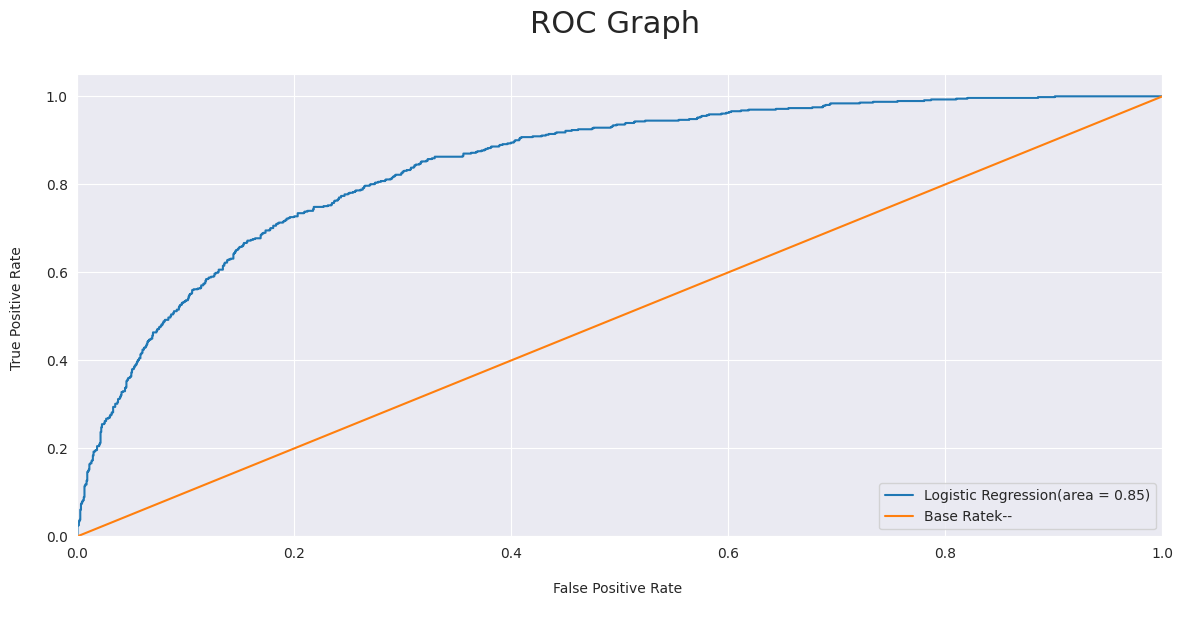

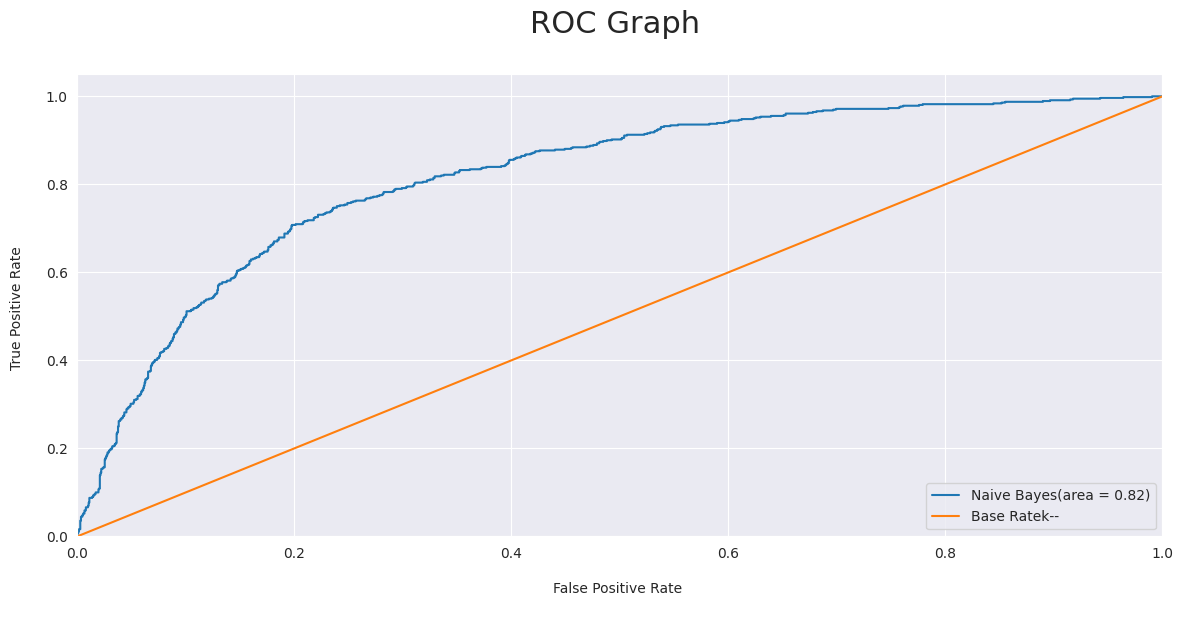

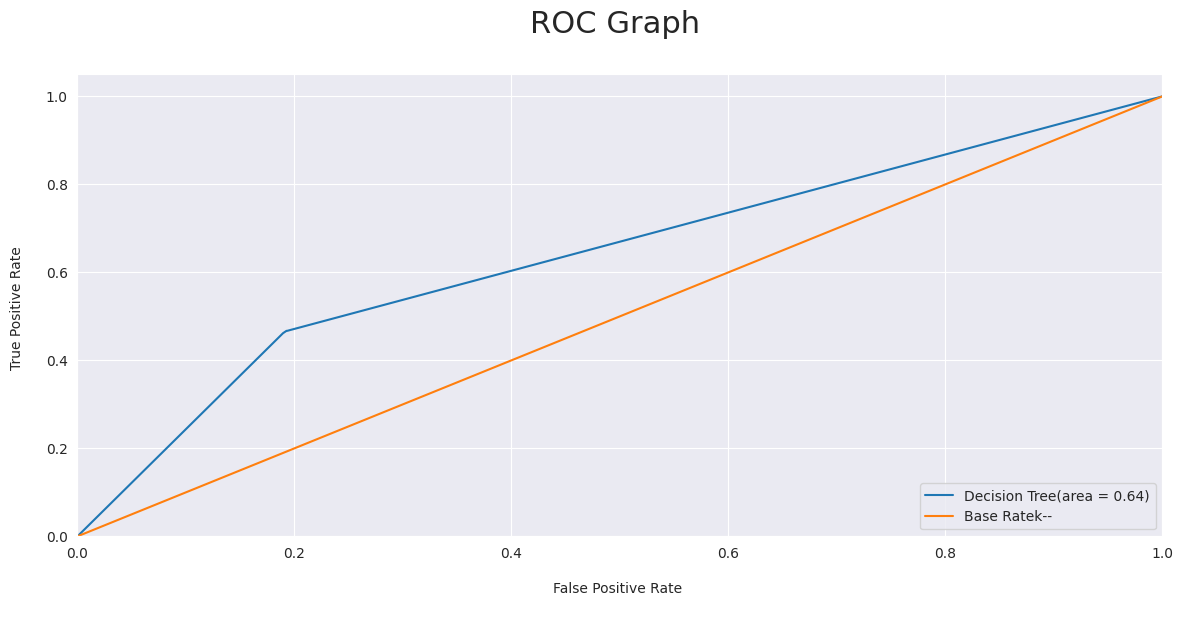

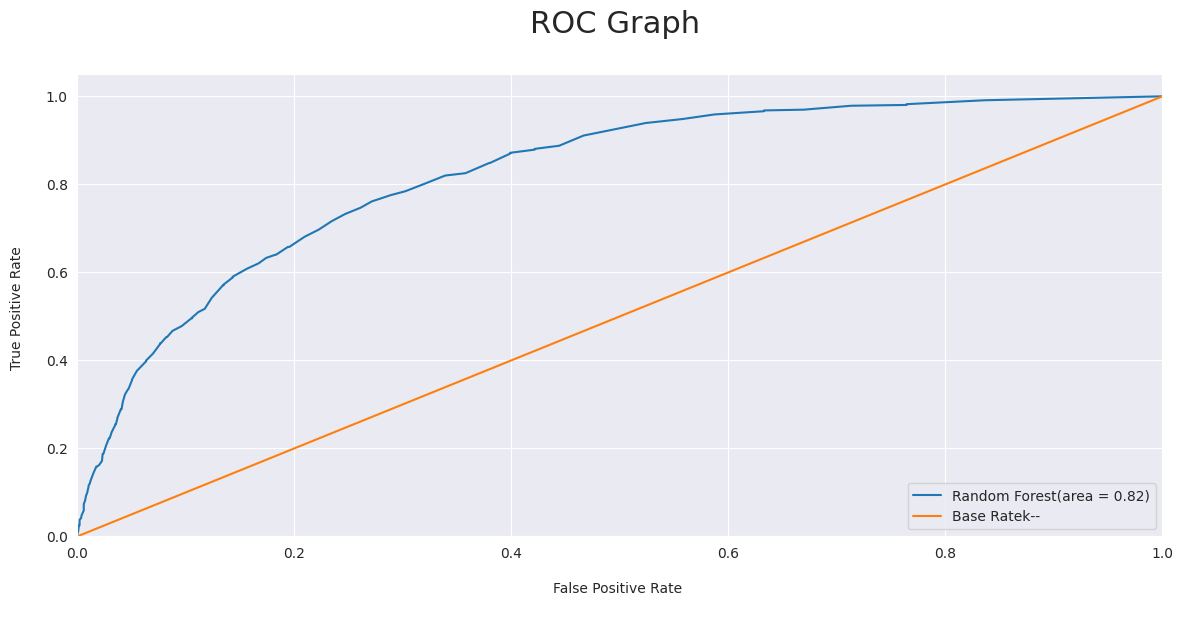

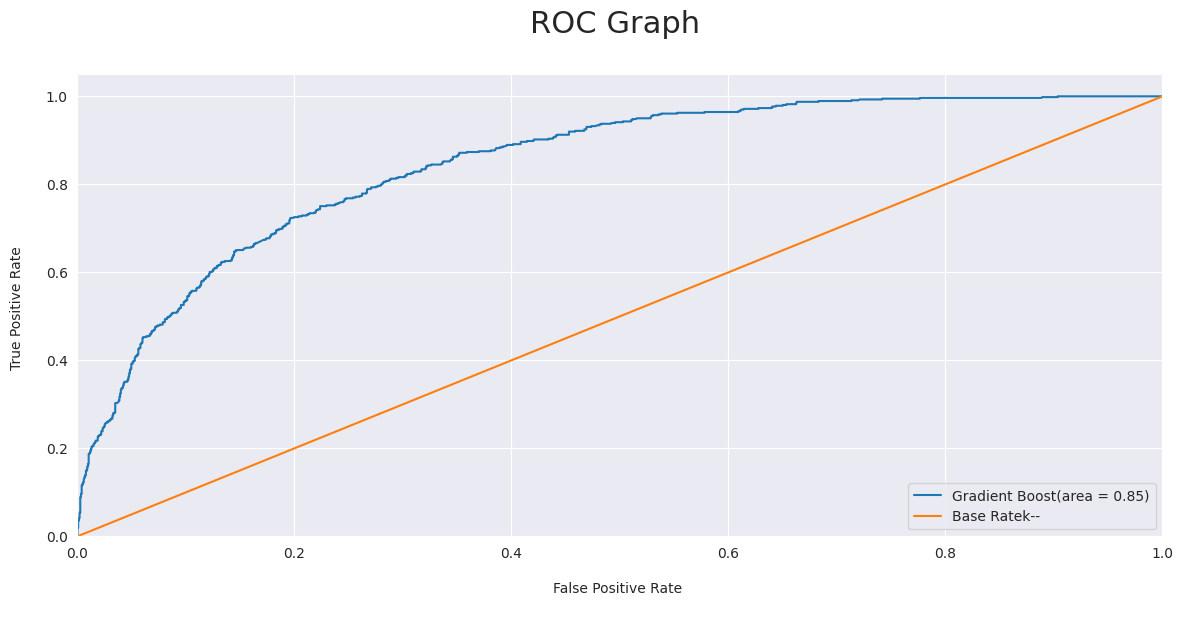

In [77]:
preds = [y_pred, y_pred1,  y_pred2, y_pred3, y_pred4]
classifiers = [classifier , classifier1, classifier2, classifier3, classifier4]
model_names_ = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest", "Gradient Boost"]

for i, j, k in zip(classifiers, model_names_, predictions):
    ROC_curve(i, j, k)

# Predicting feature importance

In [78]:
# Gradient Boost
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier4.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
14,Contract,0.405055
4,tenure,0.133310
17,MonthlyCharges,0.126390
18,TotalCharges,0.113760
8,OnlineSecurity,0.071139
11,TechSupport,0.061702
16,PaymentMethod,0.018138
7,InternetService,0.016901
9,OnlineBackup,0.012672
1,SeniorCitizen,0.009119


# Hyper Parameter Tuning

**`Using Randomized search CV with Gradient Boost`**

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

gbHyperParams = {'loss' : ['log_loss', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = classifier4, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['log_loss', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b1f1170c70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b1f1386c20>},
                   scoring='roc_auc')

In [80]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'log_loss', 'max_depth': 1, 'n_estimators': 296}, 0.8472438064123532)

In [81]:
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [82]:
test_labels_GB = bestGBModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_GB , average = 'macro', sample_weight = None)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.8486502379771027

Using Grid Search CV with Gradient Boost

In [83]:
from sklearn.model_selection import GridSearchCV

gb_param_grid = {'loss' : ['log_loss'],
                 'n_estimators': [10,100,200,300],
                 'max_depth': [1,2,4,6,8]}

gsGB = GridSearchCV(classifier4, param_grid = gb_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsGB.fit(X_train,y_train)

gb_best = gsGB.best_estimator_
print(gb_best)
print(gsGB.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
GradientBoostingClassifier(max_depth=1, n_estimators=300)
0.847135517719558


In [84]:
bestGBModFitted2 = gsGB.best_estimator_.fit(X_train, y_train)
test_labels_gb2 = bestGBModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_gb2 , average = 'macro', sample_weight = None)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.8486778028924784